In [57]:
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [58]:
 df = pd.read_csv("Social.csv")

In [59]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [60]:
df.shape

(400, 5)

In [61]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [62]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [63]:
df.drop(['User ID'],axis = 1, inplace = True )

In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [65]:
df['Gender'] = le.fit_transform(df['Gender'])

In [66]:
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
5,1,27,58000,0
6,0,27,84000,0
7,0,32,150000,1
8,1,25,33000,0
9,0,35,65000,0


In [67]:
dfcor = df.corr()
dfcor

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,-0.060435,0.155238,1.000000,0.362083
Purchased,-0.042469,0.622454,0.362083,1.000000


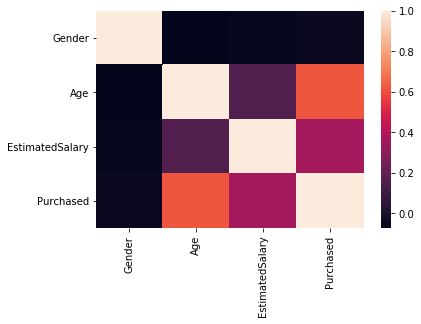

In [68]:
sns.heatmap(dfcor)

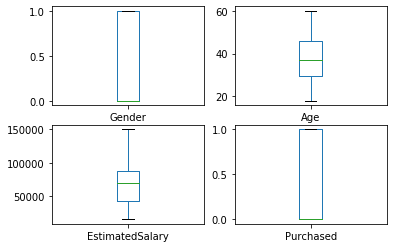

In [88]:
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

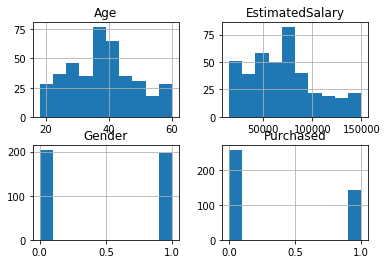

In [89]:
df.hist()
pyplot.show()

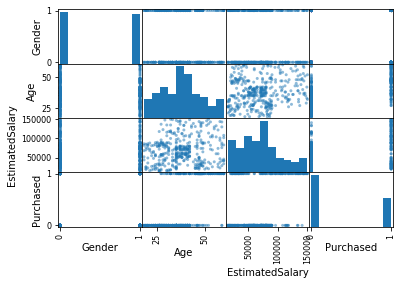

In [90]:
scatter_matrix(df)
pyplot.show()

In [91]:
X = df.iloc[:,0:3]
X

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
5,1,27,58000
6,0,27,84000
7,0,32,150000
8,1,25,33000
9,0,35,65000


In [92]:
Y = df.iloc[:,-1]
Y

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      1
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     0
29     0
      ..
370    1
371    1
372    0
373    1
374    0
375    1
376    0
377    0
378    1
379    1
380    0
381    1
382    1
383    1
384    1
385    1
386    1
387    0
388    1
389    1
390    1
391    1
392    1
393    1
394    0
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [94]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [95]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.844211 (0.064659)
LDA: 0.837961 (0.065900)
KNN: 0.922147 (0.046039)
CART: 0.878195 (0.044887)
NB: 0.903403 (0.071645)
SVM: 0.915897 (0.058746)


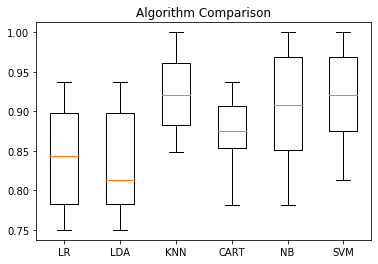

In [96]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [97]:
kfold = StratifiedKFold(n_splits=10, random_state=1)
cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
cv_results
print(cv_results.mean())

0.9158968719452589


In [98]:
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

In [99]:
from sklearn.model_selection import cross_val_predict

k_predictions = cross_val_predict(model, X, Y, cv=10)
print(k_predictions)

[0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1
 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0
 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0
 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1
 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0]


In [100]:
predictions

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [101]:
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.85
[[39  9]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.93      0.81      0.87        48
           1       0.76      0.91      0.83        32

    accuracy                           0.85        80
   macro avg       0.85      0.86      0.85        80
weighted avg       0.86      0.85      0.85        80



In [102]:
k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
    print(k_scores)

[0.7967417135709818]
[0.7967417135709818, 0.7769824890556598]
[0.7967417135709818, 0.7769824890556598, 0.7796685428392746]
[0.7967417135709818, 0.7769824890556598, 0.7796685428392746, 0.7893574108818011]
[0.7967417135709818, 0.7769824890556598, 0.7796685428392746, 0.7893574108818011, 0.777171669793621]
[0.7967417135709818, 0.7769824890556598, 0.7796685428392746, 0.7893574108818011, 0.777171669793621, 0.7768511569731082]
[0.7967417135709818, 0.7769824890556598, 0.7796685428392746, 0.7893574108818011, 0.777171669793621, 0.7768511569731082, 0.7822357723577236]
[0.7967417135709818, 0.7769824890556598, 0.7796685428392746, 0.7893574108818011, 0.777171669793621, 0.7768511569731082, 0.7822357723577236, 0.7842933083176986]
[0.7967417135709818, 0.7769824890556598, 0.7796685428392746, 0.7893574108818011, 0.777171669793621, 0.7768511569731082, 0.7822357723577236, 0.7842933083176986, 0.779543464665416]
[0.7967417135709818, 0.7769824890556598, 0.7796685428392746, 0.7893574108818011, 0.77717166979362

[0.7967417135709818, 0.7769824890556598, 0.7796685428392746, 0.7893574108818011, 0.777171669793621, 0.7768511569731082, 0.7822357723577236, 0.7842933083176986, 0.779543464665416, 0.7618417761100689, 0.7794121325828643, 0.7738477173233271, 0.7817901813633521, 0.776661976235147, 0.7717839274546592, 0.7716588492808005, 0.7592198248905567, 0.7738445903689807, 0.7665306441525954, 0.7714055659787368, 0.771594746716698, 0.7763477173233271, 0.7690306441525955, 0.7764696685428394, 0.781601000625391, 0.7889118198874298, 0.781661976235147, 0.7765337711069419, 0.7715978736710445, 0.7764118198874297]


In [103]:
print('Length of list', len(k_scores))
print('Max of list', max(k_scores))

Length of list 30
Max of list 0.7967417135709818


Text(0, 0.5, 'Cross-validated accuracy')

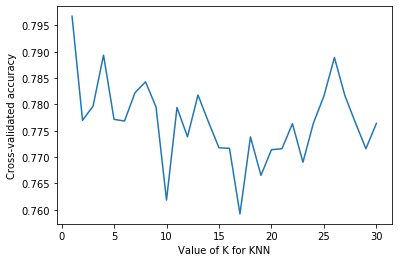

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

In [105]:
knn = KNeighborsClassifier(n_neighbors=1)


cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean()

0.7967417135709818

In [106]:
from sklearn.externals import joblib
joblib.dump(knn,'Project20_SocialAds.pkl')

C:\Users\Amitesh.Patel\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['Project20_SocialAds.pkl']